# Solver for the wave equation in 1d

Module `wave1d` implements a finite difference solver for the equation

\begin{cases}
\partial_t^2 u - a(x) \partial_x^2 u = f, & \text{on $(0,T) \times (0,L)$},
\\
\partial_x u|_{x=0} = h_0, \quad \partial_x u|_{x=L} = h_1,
\\
u|_{t=0} = v_0, \quad \partial_t u|_{t=0} = v_1,
\end{cases}

where $T, L > 0$.

The solver is based on the book 

> H. P. Langtangen and S. Linge. _Finite Difference Computing with PDEs_.
> <https://hplgit.github.io/fdm-book/doc/web/>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import wave1d

# Verification

We fix polynomial functions $u$ and $a$ and compute symbolically $f$, $h_j$ and $v_j$, $j=0,1$, so that the above wave equation holds.
Then we compare the computed solution with $u$.

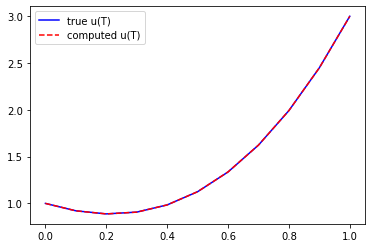

In [2]:
import sympy as sp
from sympy.abc import x, t

u = (x**3 + 2*x**2 - x + 1)*(t**2 + t - 1)
a = 1 + x**2

ut = sp.diff(u,t)
ux = sp.diff(u,x)

f = sp.lambdify([t, x], sp.diff(u,t,2) - a*sp.diff(u,x,2))
a = sp.lambdify(x, a)
v0 = sp.lambdify(x, u.subs(t,0))
v1 = sp.lambdify(x, ut.subs(t,0))
h0 = sp.lambdify(t, ux.subs(x, 0))
h1 = sp.lambdify(t, ux.subs(x, 1))
utrue = sp.lambdify([t, x], u)
T = 1
uT_true = sp.lambdify(x, u.subs(t,T))

dt = 0.05
cmax = 2
uT, ts, xs = wave1d.solver(dt, T, f=f, v0=v0, v1=v1, h0=h0, h1=h1, a=a, cmax=cmax)
plt.plot(xs, uT_true(xs), 'b', label='true u(T)')
plt.plot(xs, uT, 'r--', label='computed u(T)')
plt.legend();

Let us also plot the rate of convergence.

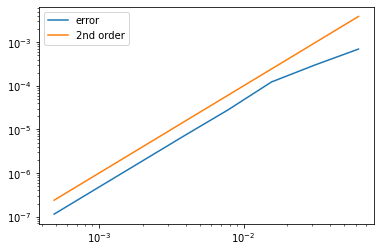

In [3]:
dts = np.array([2**(-n) for n in range(4, 12)])
N = np.size(dts)
errs = np.zeros(N)
for i in range(N):
    dt = dts[i]
    uT, ts, xs = wave1d.solver(dt, T, f=f, v0=v0, v1=v1, h0=h0, h1=h1, a=a, cmax=cmax)
    errs[i] = np.max(np.abs(uT - uT_true(xs)))
plt.loglog(dts, errs, label='error')
plt.loglog(dts, dts**2, label='2nd order')
plt.legend();

We see that the order of convergence is 2.  